In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


In [2]:
# Importing all the required Python Libraries

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels as sm

In [3]:
# Reading files (csv)

india_yt = pd.read_csv('/kaggle/input/youtube-new/INvideos.csv')

In [4]:
# Checking few heads of the dataset

india_yt.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
5,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...
6,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...
7,c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...
8,KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...
9,g8QsfJhFpjY,17.14.11,New bike vs Old bike - the reality,Jump Cuts,24,2017-11-12T04:30:01.000Z,"Jump cuts|""Jumpcuts""|""Tamil comedy""|""Tamil Com...",969030,59798,1545,2404,https://i.ytimg.com/vi/g8QsfJhFpjY/default.jpg,False,False,False,Jump Cuts is a Tamil entertaining group by Har...


In [5]:
# Checking the Size of the Dataset

india_yt.shape

(37352, 16)

We can see that there are
* Rows = 37352
* Columns = 16

In [6]:
# Checking duplicates
india_yt.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
37347     True
37348     True
37349     True
37350     True
37351     True
Length: 37352, dtype: bool

There are lots of duplicates.
We need to fix that.


In [7]:
# Removing duplicates

india_yt = india_yt.drop_duplicates(keep='first')


In [8]:
# Rechecking if duplicates have been removed with size of the database

india_yt.shape


(33089, 16)

**The shape or the number of rows has decreased that suggest that duplicate has been removed.**

In [9]:
# Checking the basic overview of the dataset

india_yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33089 entries, 0 to 37330
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                33089 non-null  object
 1   trending_date           33089 non-null  object
 2   title                   33089 non-null  object
 3   channel_title           33089 non-null  object
 4   category_id             33089 non-null  int64 
 5   publish_time            33089 non-null  object
 6   tags                    33089 non-null  object
 7   views                   33089 non-null  int64 
 8   likes                   33089 non-null  int64 
 9   dislikes                33089 non-null  int64 
 10  comment_count           33089 non-null  int64 
 11  thumbnail_link          33089 non-null  object
 12  comments_disabled       33089 non-null  bool  
 13  ratings_disabled        33089 non-null  bool  
 14  video_error_or_removed  33089 non-null  bool  
 15  de

> **Few things can be noticed here.**

> Data type of the below columns are not accurate
> 1.  trending_date
> 1.  publish_time
> 
> And also, there are No null values.


In [10]:
# Checking few Datatypes

india_yt['trending_date'].describe()

count        33089
unique         205
top       17.14.11
freq           200
Name: trending_date, dtype: object

**** The datatype should be changed to datatime of some sort ****

In [11]:
## Rechecking few other specific rows
india_yt['trending_date'].loc[200]

'17.15.11'

In [12]:
# Fixing few Datatypes

## defining a function with for loop, to split the element and then to re-arrange it
def datetime_split(df):
    split = df.split('.')
    return split[1]+"."+split[2]+"."+split[0]

india_yt['trending_date'] = india_yt['trending_date'].apply(datetime_split) 

india_yt['trending_date'] = pd.to_datetime(india_yt['trending_date'])

pd.to_datetime(india_yt['trending_date'])

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
37300   2018-06-14
37301   2018-06-14
37302   2018-06-14
37319   2018-06-14
37330   2018-06-14
Name: trending_date, Length: 33089, dtype: datetime64[ns]

In [13]:
# Checking the dtype change
india_yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33089 entries, 0 to 37330
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                33089 non-null  object        
 1   trending_date           33089 non-null  datetime64[ns]
 2   title                   33089 non-null  object        
 3   channel_title           33089 non-null  object        
 4   category_id             33089 non-null  int64         
 5   publish_time            33089 non-null  object        
 6   tags                    33089 non-null  object        
 7   views                   33089 non-null  int64         
 8   likes                   33089 non-null  int64         
 9   dislikes                33089 non-null  int64         
 10  comment_count           33089 non-null  int64         
 11  thumbnail_link          33089 non-null  object        
 12  comments_disabled       33089 non-null  bool  

In [14]:
# Fixing few Datatypes

india_yt['publish_time'] = pd.to_datetime(india_yt['publish_time'])

#doing dt.normalise to make it in datetime ns datatype
india_yt['publish_time'] = india_yt['publish_time'].dt.normalize()

In [15]:
# Checking the dtype change

india_yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33089 entries, 0 to 37330
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                33089 non-null  object             
 1   trending_date           33089 non-null  datetime64[ns]     
 2   title                   33089 non-null  object             
 3   channel_title           33089 non-null  object             
 4   category_id             33089 non-null  int64              
 5   publish_time            33089 non-null  datetime64[ns, UTC]
 6   tags                    33089 non-null  object             
 7   views                   33089 non-null  int64              
 8   likes                   33089 non-null  int64              
 9   dislikes                33089 non-null  int64              
 10  comment_count           33089 non-null  int64              
 11  thumbnail_link          33089 non-null  o

In [16]:
india_yt.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 00:00:00+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 00:00:00+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 00:00:00+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 00:00:00+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 00:00:00+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [17]:
# Checking the descriptive summary of the overall dataset
india_yt.describe()

,category_id,views,likes,dislikes,comment_count
count,33089.000000,3.308900e+04,3.308900e+04,3.308900e+04,33089.000000
mean,21.628154,9.963425e+05,2.558762e+04,1.576535e+03,2524.777660
std,6.493615,3.148111e+06,9.647320e+04,1.689573e+04,14769.825108
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000
25%,23.000000,1.127190e+05,7.870000e+02,9.800000e+01,72.000000
50%,24.000000,2.750270e+05,2.757000e+03,2.890000e+02,298.000000
75%,24.000000,7.320220e+05,1.201100e+04,9.320000e+02,1169.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000


<Axes: >

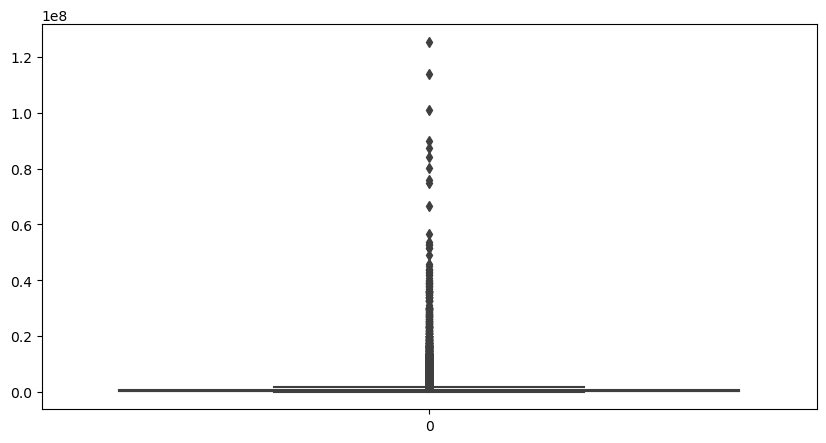

In [18]:
# Checking the spread of the dataset

## Using a boxplot with seabron
plt.figure(figsize=(10,5))
sns.boxplot(india_yt['views'])

<Axes: >

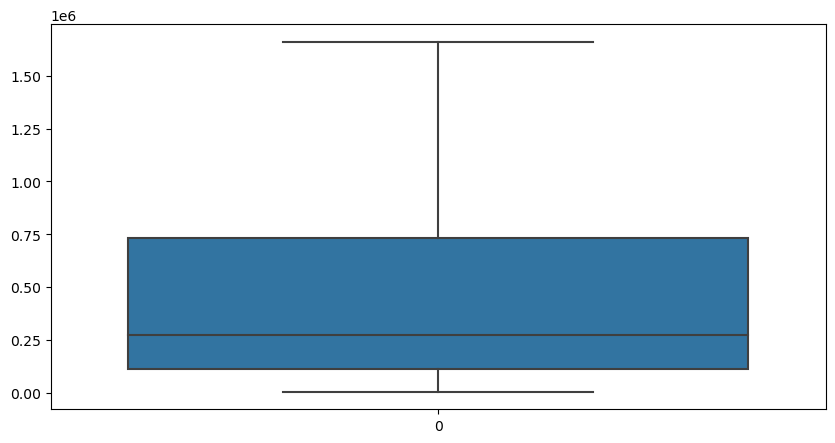

In [19]:
# Checking the skewness of the data without outliers

plt.figure(figsize=(10,5))
sns.boxplot(india_yt['views'],showfliers=False)

**As we can see from the boxplot.**

> The data is skewed. 
> Majority of the value is concentrated below the 75% mark of the data. 
> 
> So, the data is right skewed.

In [20]:
# The mean of views

india_yt['views'].mean()

996342.5065731814

In [21]:
# The median of views

india_yt['views'].median()

275027.0

**The mean is way greater than the median of the data.** 

**This suggest that there are some huge values that are making the average way to large.**

In [22]:
## Let's find the time it takes for a video to get to the trending from the date it has been published

india_yt['trending_date'] = pd.to_datetime(india_yt['trending_date'])

In [23]:
india_yt['publish_time'] = pd.to_datetime(india_yt['publish_time'].dt.date)

In [24]:
# No of days between Published and Trending

india_yt['days_to_trend'] = india_yt['trending_date'] - india_yt['publish_time']

In [25]:
india_yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33089 entries, 0 to 37330
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                33089 non-null  object         
 1   trending_date           33089 non-null  datetime64[ns] 
 2   title                   33089 non-null  object         
 3   channel_title           33089 non-null  object         
 4   category_id             33089 non-null  int64          
 5   publish_time            33089 non-null  datetime64[ns] 
 6   tags                    33089 non-null  object         
 7   views                   33089 non-null  int64          
 8   likes                   33089 non-null  int64          
 9   dislikes                33089 non-null  int64          
 10  comment_count           33089 non-null  int64          
 11  thumbnail_link          33089 non-null  object         
 12  comments_disabled       33089 no

In [26]:
#checking the new column
india_yt.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trend
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2 days
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",1 days
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2 days
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,2 days
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,1 days
5,il_pSa5l98w,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,4 days
6,7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,3 days
7,c64I9HNpiOY,2017-11-14,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,3 days
8,KObFEYCaRx8,2017-11-14,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...,1 days
9,g8QsfJhFpjY,2017-11-14,New bike vs Old bike - the reality,Jump Cuts,24,2017-11-12,"Jump cuts|""Jumpcuts""|""Tamil comedy""|""Tamil Com...",969030,59798,1545,2404,https://i.ytimg.com/vi/g8QsfJhFpjY/default.jpg,False,False,False,Jump Cuts is a Tamil entertaining group by Har...,2 days


In [27]:
# Converting the days to trend dtype from timedelta to days ie. float/int, for further calculation

## We used dt.days to conevrt this to interger, otherwise the value will change **

india_yt['days_to_trend'] = india_yt['days_to_trend'].dt.days

> So, there are few things that can be seen here.
> 
> The data is a little faulty. 
> 
> The minimum days that it took to hit the trending tab is showing to be negative. Which is practically impossible. 

> We need to fix that, since it is messing up the whole data stats.

In [28]:
# Checking the summary of the days_to_trend column

india_yt['days_to_trend'].describe()

count    33089.000000
mean        16.457856
std         90.071729
min       -322.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        344.000000
Name: days_to_trend, dtype: float64

**As we can see the minimum is showing in negative for day_to_trend, which is not possible.** 

So, we need to fix this

In [29]:
# Fixing days_too_trend mistake

# Checking the total number of error values
india_yt[india_yt['days_to_trend'] < 0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trend
3256,6ZfuNTqbHE8,2017-01-12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157733,34077,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,-321
3257,hYM_iZII4U4,2017-01-12,Thaanaa Serndha Koottam Official Tamil Teaser ...,Sony Music India,10,2017-11-30,"Thaanaa Serndha Koottam - Naana Thaana Lyric|""...",3679229,294624,58475,18872,https://i.ytimg.com/vi/hYM_iZII4U4/default.jpg,False,False,False,"'Veratti veratti velukka thonuthu,\nAthigaara ...",-322
3258,yKkheNpuOKU,2017-01-12,Salman Khan और Katrina भी रोये जब अमिताभ बच्चन...,Prime Minister Narender Modi,24,2017-11-29,"amitabh bachchan|""iffi""|""goa""|""akshay kumar""|""...",2243552,13738,1834,1291,https://i.ytimg.com/vi/yKkheNpuOKU/default.jpg,False,False,False,NaN,-321
3259,Ta3Yruzx_lA,2017-01-12,Oru Nalla Naal Paathu Solren Teaser | Vijay Se...,Think Music India,1,2017-11-29,"Oru Nalla Naal Paathu Solren Teaser|""Oru Nalla...",1595682,67254,1342,1886,https://i.ytimg.com/vi/Ta3Yruzx_lA/default.jpg,False,False,False,#OruNallaNaalPaathuSolrenTeaser | #OruNallaNaa...,-321
3260,Ut-JRKyMjEI,2017-01-12,Audition Gone Wrong Ft. Ashish Chanchlani | Mo...,MostlySane,23,2017-11-30,"prajakta koli|""mostly sane""|""mostlysane""|""late...",486946,25582,1187,1623,https://i.ytimg.com/vi/Ut-JRKyMjEI/default.jpg,False,False,False,"Hey dumdums this was such a fun collaboration,...",-322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35712,1J76wN0TPI4,2018-05-06,Sanju | Official Trailer | Ranbir Kapoor | Raj...,FoxStarHindi,24,2018-05-30,"Sanju|""Official Trailer""|""sanju official trail...",34081968,726241,27525,73915,https://i.ytimg.com/vi/1J76wN0TPI4/default.jpg,False,False,False,Few lives in our times are as dramatic and eni...,-24
35714,M0oZG60WD9Y,2018-05-06,Engineering Girls | Web Series | S01E01 - Prac...,The Timeliners,24,2018-06-01,"funny videos|""hotels""|""comedy""|""comedy video""|...",2107572,92760,3614,6131,https://i.ytimg.com/vi/M0oZG60WD9Y/default.jpg,False,False,False,It is the morning of Maggu's final practical e...,-26
35724,sosljVNKfgQ,2018-05-06,Sarla Is Sick Of Kapil - The Kapil Sharma Show,SET India,24,2018-06-03,"the kapil sharma show|""hassi ke gubbare""|""sony...",926452,5080,713,252,https://i.ytimg.com/vi/sosljVNKfgQ/default.jpg,False,False,False,Click here to Subscribe to SETINDIA Channel : ...,-28
35738,Vi98yrS4RX0,2018-05-06,Anubhavinchu Raja | 2nd June 2018 | Full Episo...,ETV Plus India,23,2018-06-02,"etv Plus|""etv comedy show""|""3 Idiots""|""anchor ...",670288,3728,582,486,https://i.ytimg.com/vi/Vi98yrS4RX0/default.jpg,False,False,False,Anubhavinchu Raja అనుభవించు రాజా,-27


**Found : 4049 rows of the dates are wrongs**

In [30]:
# removing rows with negative days to trend

error_index = (india_yt[india_yt['days_to_trend'] < 0]).index

In [31]:
india_yt = india_yt.drop(error_index)

In [32]:
# Checking now of rows after deleting errors

india_yt.shape

(29040, 17)

Around 4000 rows has been deleted. 

In [33]:
# Let's check some descriptive summary of the days_to_week column

india_yt['days_to_trend'].describe()

count    29040.000000
mean        35.664360
std         71.439696
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        344.000000
Name: days_to_trend, dtype: float64

> So, as we can see the negatives are gone and the min bas come down to 0 which is fair enough.
> Also,
> Mean and Standard deviation is way to far and this is because the maximum days is pulling the data and making with skewed.

<Axes: >

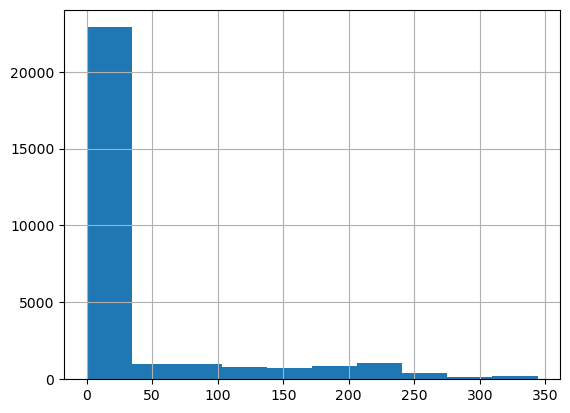

In [34]:
# Checking the Probability distribution of the days_to_trend.

# Using a hsitogram to check the overall distribution

india_yt['days_to_trend'].hist()

## The days_to_trend data is highly right skewed.
**This suggests that majority of the videos that end up in the trending section, reaching the trending page within the first day of its upload.
Where only a handful of videos take more days to get to the trending page.**

In [35]:
india_yt.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trend
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",1
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,2
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,1


### Let's find which day of the week, when published, pushed the highest number of trending videos

In [36]:
# Creating a new column with day names of the published date

india_yt['published_weekday'] = india_yt['publish_time'].dt.strftime('%A')
india_yt['published_weekday']

0           Sunday
1           Monday
2           Sunday
3           Sunday
4           Monday
           ...    
37300       Friday
37301    Wednesday
37302       Monday
37319       Monday
37330    Wednesday
Name: published_weekday, Length: 29040, dtype: object

Text(0, 0.5, 'No. of Videos Trending')

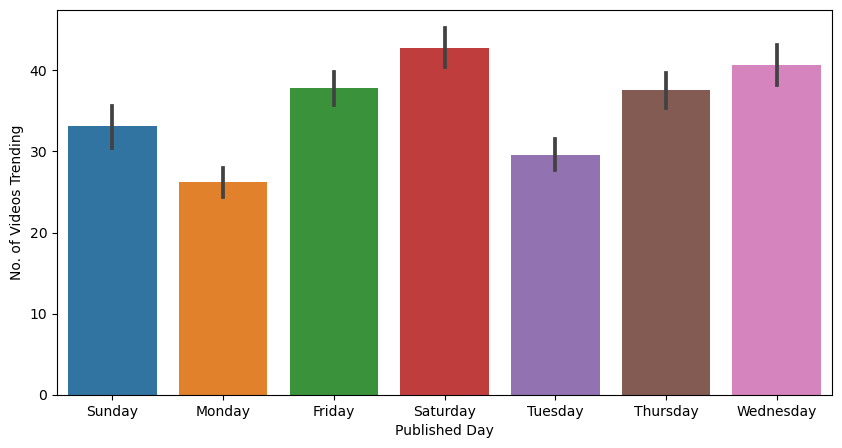

In [37]:
# Let's create a barplot to plot the day published and the day to trend

plt.figure(figsize=(10,5))
sns.barplot(data=india_yt, x = 'published_weekday' , y = 'days_to_trend'  )
plt.xlabel('Published Day')
plt.ylabel('No. of Videos Trending')

In [57]:
# Value counts as per day of week

india_yt['published_weekday'].value_counts()

Friday       4888
Saturday     4586
Thursday     4297
Tuesday      4108
Monday       4062
Wednesday    4006
Sunday       3093
Name: published_weekday, dtype: int64

**Videos published on Saturdays, seems to react more, and pushed it to trending page more frequently, adn the least reactive being Mondays.
Summary, videos published on weekends, are more likely to the trending page faster**

### Finding out which Category has the most numbers of Trending videos oevr the time period of 2017-2018

In [38]:
## Getting the total numbers Category wise, to find out the top performing category of videos

india_yt['category_id'].value_counts()

24    12877
25     4112
10     2980
23     2578
22     2085
1      1309
27     1016
26      734
17      566
28      457
43      124
29       97
20       47
2        44
19        6
30        5
15        3
Name: category_id, dtype: int64

**The category_id = 24 has the highest numbers of trending video as per the data, followed by 25. 
Which category_id = 15 , has the least numbers of tredning video**

### Let's find if any channel is pumping out trending videos continously

In [39]:
## Getting the total numbers Channel wise, to find out the top performing category of videos

india_yt['channel_title'].value_counts()

VikatanTV             181
SAB TV                181
etvteluguindia        179
ETV Plus India        178
Study IQ education    176
                     ... 
Polimer TV              1
COMEDY SONOTEK          1
WowShow                 1
MeriBuggi               1
Desi Tips hindi         1
Name: channel_title, Length: 1389, dtype: int64

**As we can see, Vikatan TV and SAB TV are the two top channels that pumped out 181 trending video,over this time period.
Whereas, Desi Tips Hindi, has the least amount of trending videos this year, only 1.**

### Let's take a sample of the data, to fogure out how much of sample variance is there , and will it have any impact on the overall discision output 

In [40]:
#Taking a sample data of around 100 elements

sample_data1 = india_yt.sample(n=100, replace = True, random_state = 65153)

In [41]:
# Checking top 10 rows of the sample

sample_data1.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trend,published_weekday
34233,TqR_jWfHW4g,2018-05-28,Humnava Mere Lyrical Video | Jubin Nautiyal | ...,T-Series,10,2018-05-27,"latest hindi songs|""bollywood songs""|""songs""|""...",210031,8462,361,1083,https://i.ytimg.com/vi/TqR_jWfHW4g/default.jpg,False,False,False,Presening the lyrical video of the romantic so...,1,Sunday
22252,SU1Sq3NdnTA,2018-03-18,Kirrak Party Theatrical Trailer | Nikhil | Sa...,AK Entertainments,1,2018-03-13,"Kirrak Party Theatrical Trailer|""kirrak party ...",2216785,41176,1626,1739,https://i.ytimg.com/vi/SU1Sq3NdnTA/default.jpg,False,False,False,Watch #KirrakParty Theatrical Trailer\n\n#Kirr...,5,Tuesday
18703,3vRBcKl7fEA,2018-02-25,శ్రీదేవి కన్నుమూత...అసలు కారణాలు ఇవే|Actor Sri...,Filmy Poster,24,2018-02-25,"Filmy poster|""celebrity news""|""శ్రీదేవి కన్నుమ...",71950,132,74,38,https://i.ytimg.com/vi/3vRBcKl7fEA/default.jpg,False,False,False,శ్రీదేవి కన్నుమూత...అసలు కారణాలు ఇవే|Actor Sri...,0,Sunday
7346,uDf_WLrM7gE,2017-12-22,Dhakkad Yaar (Full Video)| Ajit Singh | Latest...,PTC Motion Pictures,10,2017-12-20,"ptc|""ptc motion pictures""|""punjabi movie""|""pun...",402570,14806,670,796,https://i.ytimg.com/vi/uDf_WLrM7gE/default.jpg,False,False,False,Song:- Dhakk...,2,Wednesday
33956,xL2hIBjAcdM,2018-05-27,"Lagira Zhala Jee - Episode 342 - May 26, 2018...",Ditto TV,24,2018-05-25,"zee marathi|""tv""|""television""|""soap""|""episode""...",348874,996,79,86,https://i.ytimg.com/vi/xL2hIBjAcdM/default.jpg,False,False,False,Watch Lagira Zhala Jee and other Zee Marathi s...,2,Friday
27082,gSxkueLTOXI,2018-04-19,INDIA WE WANT VS INDIA WE HAVE - | Elvish Yadav |,Elvish yadav,23,2018-04-18,"INDIA WE WANT VS INDIA WE HAVE ELVISH YADAV|""E...",1026293,124149,2153,7508,https://i.ytimg.com/vi/gSxkueLTOXI/default.jpg,False,False,False,This video basically shows the difference betw...,1,Wednesday
1330,bX4lYE_fxjE,2017-11-20,AgniParitchai:வீடியோ கேசட் வாடகைக்கு கொடுத்த ச...,Puthiya Thalaimurai TV,25,2017-11-18,"Income Tax Raid|""IT Officials""|""IT Raid at JAY...",84043,469,121,259,https://i.ytimg.com/vi/bX4lYE_fxjE/default.jpg,False,False,False,18/11/17 | Exclusive Interview with TTV Dhinak...,2,Saturday
682,xx5ur6QKnRY,2017-11-17,FilterCopy | Types Of BFFs | Part 2 | Ft. Himi...,FilterCopy,23,2017-11-16,"BFF|""best friend""|""friend""|""mate""|""yaar""|""room...",276313,9590,377,444,https://i.ytimg.com/vi/xx5ur6QKnRY/default.jpg,False,False,False,We all have different kinds of friends in our ...,1,Thursday
14192,95PoB-nEeAU,2018-01-30,Vicky Gonder's father mehal singh raises quest...,ABP Sanjha,22,2018-01-29,sanjha,163255,1545,190,173,https://i.ytimg.com/vi/95PoB-nEeAU/default.jpg,False,False,False,'ਮੁਕਾਬਲਾ ਸੀ ਤਾਂ ਮੂੰਹ 'ਚ ਗੋਲੀਆਂ ਕਿਵੇਂ ਵੱਜੀਆਂ' ਪ...,1,Monday
2147,EHeyeIxehqc,2017-11-25,Naa Peru Meenakshi | 24th November 2017 | Full...,etvteluguindia,24,2017-11-24,"etv daily serials|""etv daily soaps""|""etv ficti...",132118,646,108,147,https://i.ytimg.com/vi/EHeyeIxehqc/default.jpg,False,False,False,☛ For latest updates on ETV Channels | http://...,1,Friday


In [42]:
# Checking the overall descriptive statistics of the sample 

sample_data1.describe()

,category_id,views,likes,dislikes,comment_count,days_to_trend
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000
mean,20.850000,6.195102e+05,14976.250000,776.570000,1244.120000,33.480000
std,7.108645,1.303107e+06,36811.679634,1285.325492,2851.632587,64.994558
min,1.000000,1.978600e+04,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.097118e+05,605.250000,95.750000,60.000000,1.000000
50%,24.000000,1.936905e+05,1972.000000,243.500000,238.000000,2.000000
75%,24.000000,6.639030e+05,9225.500000,862.000000,1233.000000,29.250000
max,29.000000,1.188317e+07,254454.000000,6023.000000,20793.000000,267.000000


## Let us check the confidence interval of the sample mean of days to trend

In [43]:
# We choose a confidence level of 95% or 0.95

In [44]:
#the Z-score for 95% confidence level is 1.96

In [45]:
# Sample data mean of days_to_trend
sample_data1_mean = sample_data1['days_to_trend'].mean()

In [46]:
# lets find the margin of error

# first the standard error
standard_sample_error = sample_data1['days_to_trend'].std() / np.sqrt(sample_data1.shape[0])

# margin of error
## margin of error =  z_score * standard error

margin_of_error = 1.96 * standard_sample_error
margin_of_error

12.738933301108888

In [47]:
# We can direct use stats function to get the confidence interval

stats.norm.interval(alpha=0.95, loc = sample_data1_mean, scale = standard_sample_error)

/tmp/ipykernel_32/2601879434.py:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.norm.interval(alpha=0.95, loc = sample_data1_mean, scale = standard_sample_error)


(20.741300779779912, 46.21869922022008)

**We found that with Confidence Interval of 95, the mean range would be (20.75 , 46.21)
That is to say that we are confident that out of the random sampling, 95% of times the population mean will be included in the given range.**

> The mean of days_to_trend in sample 1 is showing 33.4, whereas the population mean of the same column is 35. 
That's a very slight difference, and it is becasue of the sample variance.

In [48]:
# Lets take 1000 samples of the same size from the population and check the overall mean.

## Defining a function to do the task of sampling of 1000 groups and taking their means to form a dataframe

big_sample_means = [] 
for i in range(1000):
    sample_means = india_yt['days_to_trend'].sample(n=100,replace=True).mean()
    big_sample_means.append(sample_means)

big_sample_df = pd.DataFrame(big_sample_means).rename({0:'sample_data_means'},axis='columns')

In [49]:
big_sample_df

,sample_data_means
0,39.77
1,14.76
2,23.67
3,33.72
4,45.43
...,...
995,30.65
996,47.88
997,44.49
998,39.24


In [50]:
# Now lets check the mean of 1000 sample sets of means
big_sample_df.mean()


sample_data_means    35.73166
dtype: float64

It is showing to be 35, that is closest to the actual population means.
But it follows the normal line distribution

array([[<Axes: title={'center': 'sample_data_means'}>]], dtype=object)

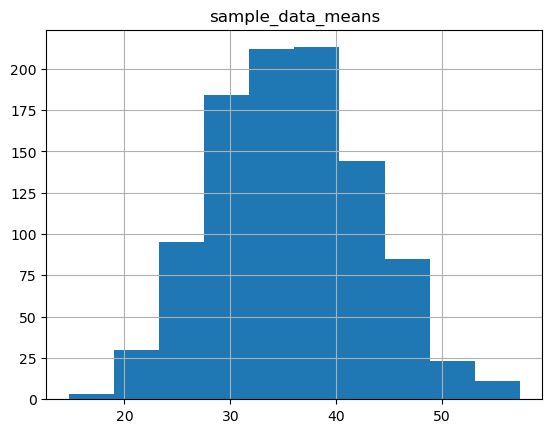

In [51]:
# lets create a histogram ti check the sample data means distribution

big_sample_df.hist()

Pretty much a bell shaped cusrved, which denotes a Noral distribution. Thus it is good for Machine learning models.

**From our previously done Confidence interval, it has been proven that the population parameter or the populatio mean is indeed in the range provide under CI of 95%**

### **Lets find out some stats about the view of the trending videos**

In [52]:
india_yt['views'].describe()

count    2.904000e+04
mean     9.762123e+05
std      2.784342e+06
min      4.359000e+03
25%      1.135940e+05
50%      2.778150e+05
75%      7.362960e+05
max      1.254322e+08
Name: views, dtype: float64

In [53]:
india_yt['views'].mean()

976212.2626033057

In [54]:
india_yt['views'].std()

2784341.584782187

<Axes: xlabel='views', ylabel='Count'>

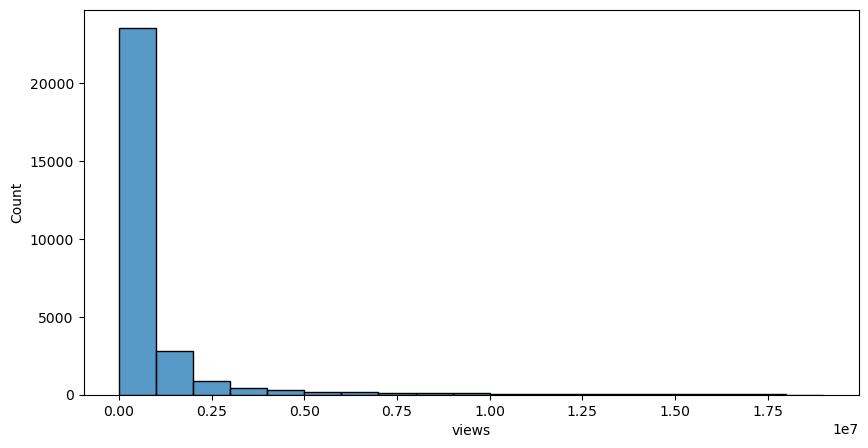

In [55]:
## Checking the distribution of the views with a histogram

plt.figure(figsize=(10,5))
sns.histplot(data=india_yt, x='views', bins = range(0,20000000,1000000) )

As we can see here, views matters a lot. 90% of the trending video have got in massive views.

### Lets check whether the number of likes and dislikes affects the time of it reaching the trending page

<Axes: xlabel='days_to_trend', ylabel='likes'>

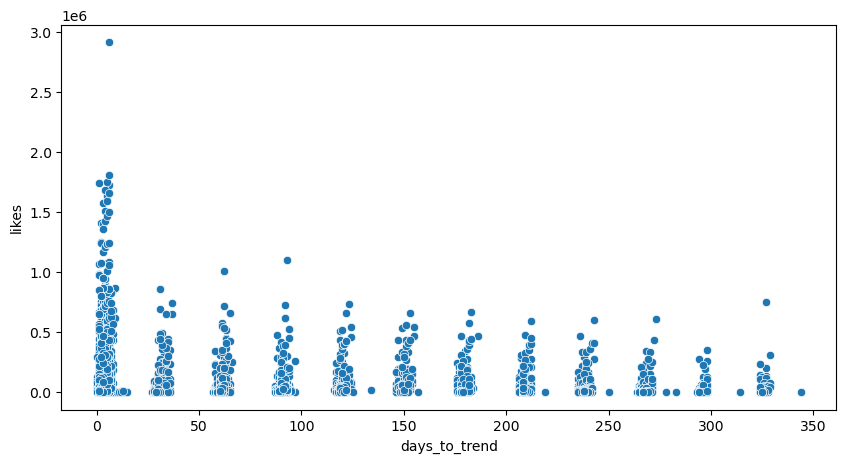

In [56]:
# Let's make 2 scatter plots of likes and dislikes with days_to_trend

# With 'likes'

plt.figure(figsize=(10,5))
sns.scatterplot(x=india_yt['days_to_trend'],y=india_yt['likes'])

# Summary of the overall Findings
> It usually takes around a day, for a video to hit trending tab

> Around 75% of the videos in the trending section, hit the trending tab within 6 days of upload. 

> Trending has a lot of videos that has been upload over the weekends, than that of weekdays like Friday, Saturday.

> Category No.24 has the largest chunk of trending videos

> SAB TV and Vikatan TV has the most numbers of trending videos 